## Comparing distribution of real part of spectra

In [14]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pickle
from scipy import stats

### Modifiable settings

In [15]:
nMin, nMax = 2, 10

In [16]:
def cumulative(data) :
    sort = [np.sort(data[i]) for i in range(len(data))]
    CDF = [np.cumsum(np.ones_like(data[i]))/len(data[i]) for i in range(len(data))]

    return sort, CDF

def rescale(data) :
    Min = [abs(min(data[i])) for i in range(len(data))]
    rescaled = [data[i]/Min[i] for i in range(len(data))]
    return rescaled

### Importing data

In [17]:
# importing files
with open('sorted_data/real_May_N2-13.pickle', 'rb') as file:
    realMay = pickle.load(file)

with open('sorted_data/real_FWstruct_N2-13.pickle', 'rb') as file:
    realFW = pickle.load(file)
    
with open('sorted_data/real_1-link_N2-13.pickle', 'rb') as file:
    realEvol1 = pickle.load(file)

with open('sorted_data/real_2-links_N2-10.pickle', 'rb') as file:
    realEvol2 = pickle.load(file)
    
# sorting data    
xMay, yMay = cumulative(realMay)
xFW, yFW = cumulative(realFW)
xEvol1, yEvol1 = cumulative(realEvol1)
xEvol2, yEvol2 = cumulative(realEvol2)

### Kolmogorov–Smirnov test

size:  2, p-value: 0.0000404, min data: 734
size:  3, p-value: 0.0000000, min data: 5301
size:  4, p-value: 0.0000001, min data: 5620
size:  5, p-value: 0.0000000, min data: 20195
size:  6, p-value: 1.0000000, min data: 9258
size:  7, p-value: 0.0000000, min data: 11655
size:  8, p-value: 1.0000000, min data: 1344
size:  9, p-value: 0.0000000, min data: 1215
size: 10, p-value: 0.0000004, min data: 40


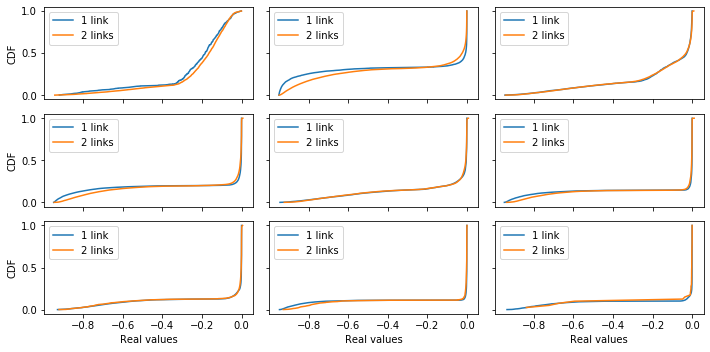

In [18]:
fig, axes = plt.subplots(3,3, figsize=(10,5), sharex=True, sharey=True);
axes[0,0].set(ylabel='CDF')
axes[1,0].set(ylabel='CDF')
axes[2,0].set(xlabel='Real values', ylabel='CDF')
axes[2,1].set(xlabel='Real values')
axes[2,2].set(xlabel='Real values')

i = 0
for ax in axes.flat :
    # Kolmogorov-Smirnov
    _, p_ks = stats.ks_2samp(xEvol2[i], xEvol1[i])
    print(f'size: {nMin+i:2.0f}, p-value: {p_ks:2.7f}, min data: {min(len(xEvol1[i]), len(xEvol2[i])):2.0f}')
    
    #ax.plot(xMay[i], yMay[i], label='May');
    ax.plot(xEvol1[i], yEvol1[i], label='1 link');
    ax.plot(xEvol2[i], yEvol2[i], label='2 links');
    ax.legend();
    
    i += 1
    
fig.tight_layout();

In [19]:
# rescaling data
printing = False

if printing == True :
    for i in range(nMax-nMin) :
        print(f'Size = {i:2.0f}')
        print(f'Min: {min(xMay[i]):2.2f}, {min(xEvol1[i]):2.2f}, {min(xEvol2[i]):2.2f}')
        print(f'Max: {max(xMay[i]):2.2f}, {max(xEvol1[i]):2.2f}, {max(xEvol2[i]):2.2f}\n')

xMay = rescale(xMay)
xFW = rescale(xFW)
xEvol1 = rescale(xEvol1)
xEvol2 = rescale(xEvol2)

if printing == True :
    for i in range(nMax-nMin) :
        print(f'Size = {nMin + i:2.0f}')
        print(f'Min: {min(xMay[i]):2.2f}, {min(xEvol1[i]):2.2f}, {min(xEvol2[i]):2.2f}')
        print(f'Max: {max(xMay[i]):2.2f}, {max(xEvol1[i]):2.2f}, {max(xEvol2[i]):2.2f}\n')

size:  2, p-value: 0.000000, min data: 734
size:  3, p-value: 0.000000, min data: 5301
size:  4, p-value: 0.000000, min data: 5620
size:  5, p-value: 0.000000, min data: 20195
size:  6, p-value: 0.000000, min data: 9258
size:  7, p-value: 0.000000, min data: 26894
size:  8, p-value: 0.000000, min data: 7096
size:  9, p-value: 0.000000, min data: 17091
size: 10, p-value: 0.000000, min data: 3040
size: 11, p-value: 0.000000, min data: 5731
size: 12, p-value: 0.000000, min data: 696
size: 13, p-value: 0.000000, min data: 1001


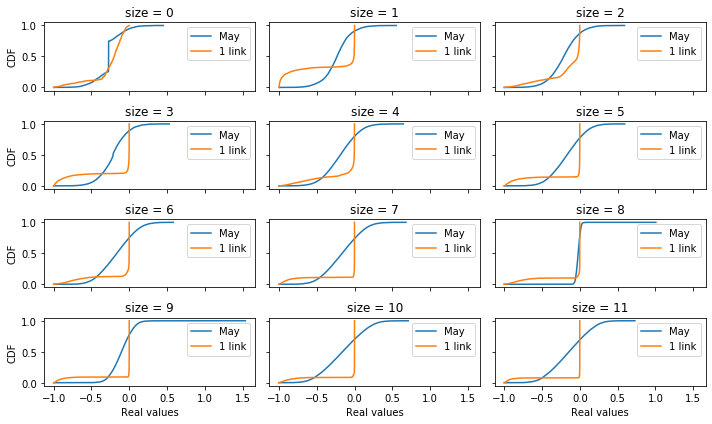

In [20]:
fig, axes = plt.subplots(4,3, figsize=(10,6), sharex=True, sharey=True);
axes[0,0].set(ylabel='CDF')
axes[1,0].set(ylabel='CDF')
axes[2,0].set(ylabel='CDF')
axes[3,0].set(xlabel='Real values', ylabel='CDF')
axes[3,1].set(xlabel='Real values')
axes[3,2].set(xlabel='Real values')

i = 0
for ax in axes.flat :
    # Kolmogorov-Smirnov
    _, p_ks = stats.ks_2samp(xMay[i], xEvol1[i])
    print(f'size: {nMin+i:2.0f}, p-value: {p_ks:2.6f}, min data: {len(xEvol1[i]):2.0f}')
    
    ax.set(title='size = ' + str(i));
    ax.plot(xMay[i], yMay[i], label='May');
    #ax.plot(xFW[i], yFW[i], label='FWstruct');
    ax.plot(xEvol1[i], yEvol1[i], label='1 link');
    #ax.plot(xEvol2[i], yEvol2[i], label='2 links');
    ax.legend();
    
    i += 1
    
fig.tight_layout();

In [21]:
fig.savefig('../figs/CDF_real_eigenvalues.png', dpi=100);

### Potential issues and future tasks
- KS-test only for continuous distributions...
- Adjust to same size.
    - From 1-0? 
    - Cut of May-data?
    - Something wrong with xEvol for size=2
- Add unstable eigenvalues

### Histograms
Importing binned data

In [8]:
binsMay = np.loadtxt('sorted_data/xMay_N2-13_binned.txt');
countsMay = np.loadtxt('sorted_data/yMay_N2-13_binned.txt');

binsFW = np.loadtxt('sorted_data/xFWstruct_N2-13_binned.txt');
countsFW = np.loadtxt('sorted_data/yFWstruct_N2-13_binned.txt');

bins1link = np.loadtxt('sorted_data/x1-link_N2-13_binned.txt');
counts1link = np.loadtxt('sorted_data/y1-link_N2-13_binned.txt');

bins2link = np.loadtxt('sorted_data/x2-links_N2-10_binned.txt');
counts2link = np.loadtxt('sorted_data/y2-links_N2-10_binned.txt');

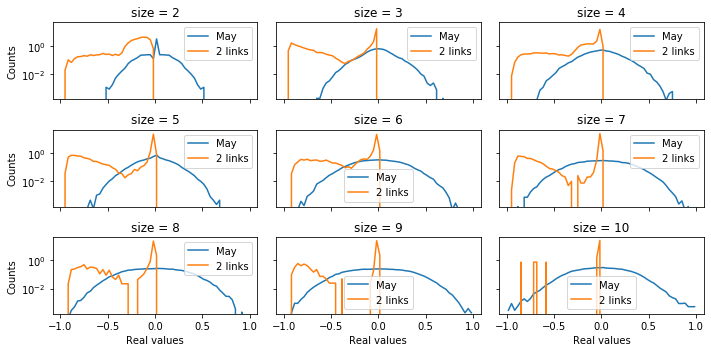

In [12]:
fig, axes = plt.subplots(3,3, figsize=(10,5), sharex=True, sharey=True);
axes[0,0].set(ylabel='Counts')
axes[1,0].set(ylabel='Counts')
axes[2,0].set(ylabel='Counts')
axes[2,0].set(xlabel='Real values', ylabel='Counts')
axes[2,1].set(xlabel='Real values')
axes[2,2].set(xlabel='Real values')

i = 0
for ax in axes.flat :
    ax.set(title='size = ' + str(nMin + i));
    ax.plot(bins1link[i], countsMay[i], label='May');
    #ax.plot(bins1link[i], counts1link[i], label='1 link');
    ax.plot(bins2link[i], counts2link[i], label='2 links');
    ax.set(yscale='log');
    ax.legend();
    
    i += 1
    
fig.tight_layout();